# Wasserstein Generative Adversarial Network

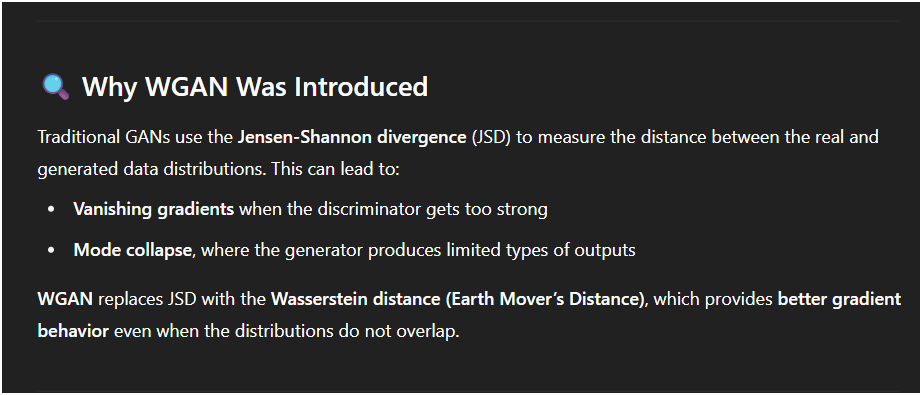

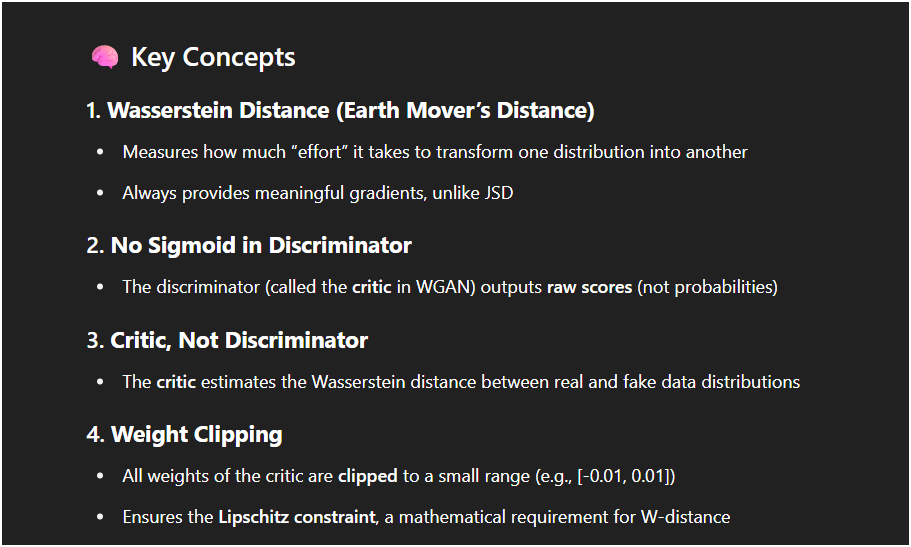

## Key Points of WGAN:-
- #### 1- Wassersterin Distance gives the idea of "How much work is required for real and fake images to be the same" through this we get a usefull number which tells us how fare is our Generator from real images resulting in the Generator always learning.
- ##### 1.1- Earth's Mover Distance:- Minimum amount of Work(effort) required to turn one pile into another.
- #### 2- Traditional GANs uses Sigmoid() at the end as it outputs a probability whether an image is real or fake; WGAN doenot want to classify the image into Yes or No (0 or 1) it wants the score of the prediction{like a critic rating of a movie} which is used for calculating Wasserstein Distance
- #### 3- In WGAN, the critic must follow the rule of Lipschitz Function which means "It can't change output too fast for small changes" so if our weights are too large then our network will change rapidly resulting it in giving Absurd Gradients to Generator; So to ensure it doesn't happen we clip the weights to be bounded in a specific limit[-0.01 to 0.01]  


In [1]:
import torch 
import torch.nn as nn


In [ ]:
class Critic(nn.Module):
    def __init__(self, img_channels, features_d):
        super(Critic, self).__init__()
        
        self.critic = nn.Sequential(
            nn.Conv2d(img_channels, features_d, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            self._block(features_d, features_d*2, kernel_size=4, stride=2, padding=1),
            self._block(features_d*2, features_d*4, kernel_size=4, stride=2, padding=1),
            self._block(features_d*4, features_d*8, kernel_size=4, stride=2, padding=1),
            nn.Conv2d(features_d*8, 1, kernel_size=4, stride=2, padding=0)
        )
        
    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False),
            nn.InstanceNorm2d(out_channels, affine=True),  #As we don't want the Normalization across the batches 
            nn.LeakyReLU(),
        )
    
    def forward(self, x):
        return self.critic(x)

In [ ]:
class Generator(nn.Module):
    def __init__(self, z_dim ,img_channels, features_g):
        super(Generator, self).__init__()
        
        self.gene = nn.Sequential(
            self._block(img_channels, features_g,4,2,1)
            nn.ConvTranspose2d(in)
        )
        
    def _block(self, in_channels, out_channels, kernel_size, stride, padding):
        return nn.Sequential(
            nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride, padding,bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
        )